# Prediction of Country FINC

- In our dataset, we have Country FINC, this feature have missing values
- The goal is to predict the missing values in Country FINC feature using machine learning

In [1]:
# Importing all the usefull libraries
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
# Importing the dataset into the dataframe
df = pd.read_excel('predict.xls')
df.head()

,Country,Year,Country FINC,Lagged FINC,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,Aruba,2005,0.0,0.0,23300.738363,58.168744,0.0,3.332795,0.0,11.513205,25.4,0,0,103.384951,55.125,0.0
1,Aruba,2006,0.0,0.0,24046.226377,57.244240,0.0,2.945295,0.0,11.521191,28.0,0,0,108.128211,55.489,0.0
2,Aruba,2007,0.0,0.0,25834.111778,54.825892,0.0,5.949807,0.0,11.525111,30.9,0,0,112.214736,55.853,0.0
3,Aruba,2008,0.0,0.0,27083.634860,60.877086,0.0,5.072878,0.0,11.526454,52.0,0,0,119.187435,56.217,0.0
4,Aruba,2009,0.0,0.0,24631.182052,70.724346,0.0,1.727073,0.0,11.527341,58.0,0,0,126.164309,56.579,0.0


- As you can see that the dataset have lot of 0.0 values
- We are going to convert this 0.0 to NaN values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        4256 non-null   object 
 1   Year                           4256 non-null   int64  
 2   Country FINC                   4256 non-null   float64
 3   Lagged FINC                    4256 non-null   float64
 4   GDPC - GDP                     4256 non-null   float64
 5   MONEY                          4256 non-null   float64
 6   CREDIT                         4256 non-null   float64
 7   INFLATION                      4256 non-null   float64
 8   LITERACY                       4256 non-null   float64
 9   POPULATION                     4231 non-null   float64
 10  USERS                          4256 non-null   float64
 11  SERVERS                        4256 non-null   int64  
 12  ISLAMICS                       4256 non-null   i

In [4]:
df.replace(0.0, np.nan, inplace = True)
df.head()

,Country,Year,Country FINC,Lagged FINC,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,Aruba,2005,NaN,NaN,23300.738363,58.168744,NaN,3.332795,NaN,11.513205,25.4,NaN,NaN,103.384951,55.125,NaN
1,Aruba,2006,NaN,NaN,24046.226377,57.244240,NaN,2.945295,NaN,11.521191,28.0,NaN,NaN,108.128211,55.489,NaN
2,Aruba,2007,NaN,NaN,25834.111778,54.825892,NaN,5.949807,NaN,11.525111,30.9,NaN,NaN,112.214736,55.853,NaN
3,Aruba,2008,NaN,NaN,27083.634860,60.877086,NaN,5.072878,NaN,11.526454,52.0,NaN,NaN,119.187435,56.217,NaN
4,Aruba,2009,NaN,NaN,24631.182052,70.724346,NaN,1.727073,NaN,11.527341,58.0,NaN,NaN,126.164309,56.579,NaN


In [5]:
# Now lets check the missing values in our dataset
df.isnull().sum()

Country                             0
Year                                0
Country FINC                     3765
Lagged FINC                      3765
GDPC - GDP                        223
MONEY                            1089
CREDIT                           3571
INFLATION                         253
LITERACY                         3005
POPULATION                         25
USERS                             639
SERVERS                          1958
ISLAMICS                         3888
MOBILE CELLULAR SUBSCRIPTIONS     349
RURAL POPULATION                  217
COMMERCIAL BANK BRANCHES          764
dtype: int64

- we are in trouble, because our data have lot of missing values
-  as you can see from the above statistics, we have 3765 missing values from the county FINC column
- Similarly the same number of missing values from Lagged FINC, and so on
- Now lets check the precentage of missing values

In [6]:
df.isnull().mean()*100

Country                           0.000000
Year                              0.000000
Country FINC                     88.463346
Lagged FINC                      88.463346
GDPC - GDP                        5.239662
MONEY                            25.587406
CREDIT                           83.905075
INFLATION                         5.944549
LITERACY                         70.606203
POPULATION                        0.587406
USERS                            15.014098
SERVERS                          46.005639
ISLAMICS                         91.353383
MOBILE CELLULAR SUBSCRIPTIONS     8.200188
RURAL POPULATION                  5.098684
COMMERCIAL BANK BRANCHES         17.951128
dtype: float64

### Lets visualize the missing values before filling them
- now we are going to visualize the missing values
- It will give more deeper view
- We are using missingno library to visualize missing values
- the following bar graph shows all the available values
- As we can see the Country FINC have 491 values which are given, we will use this values to predict the rest

<AxesSubplot:>

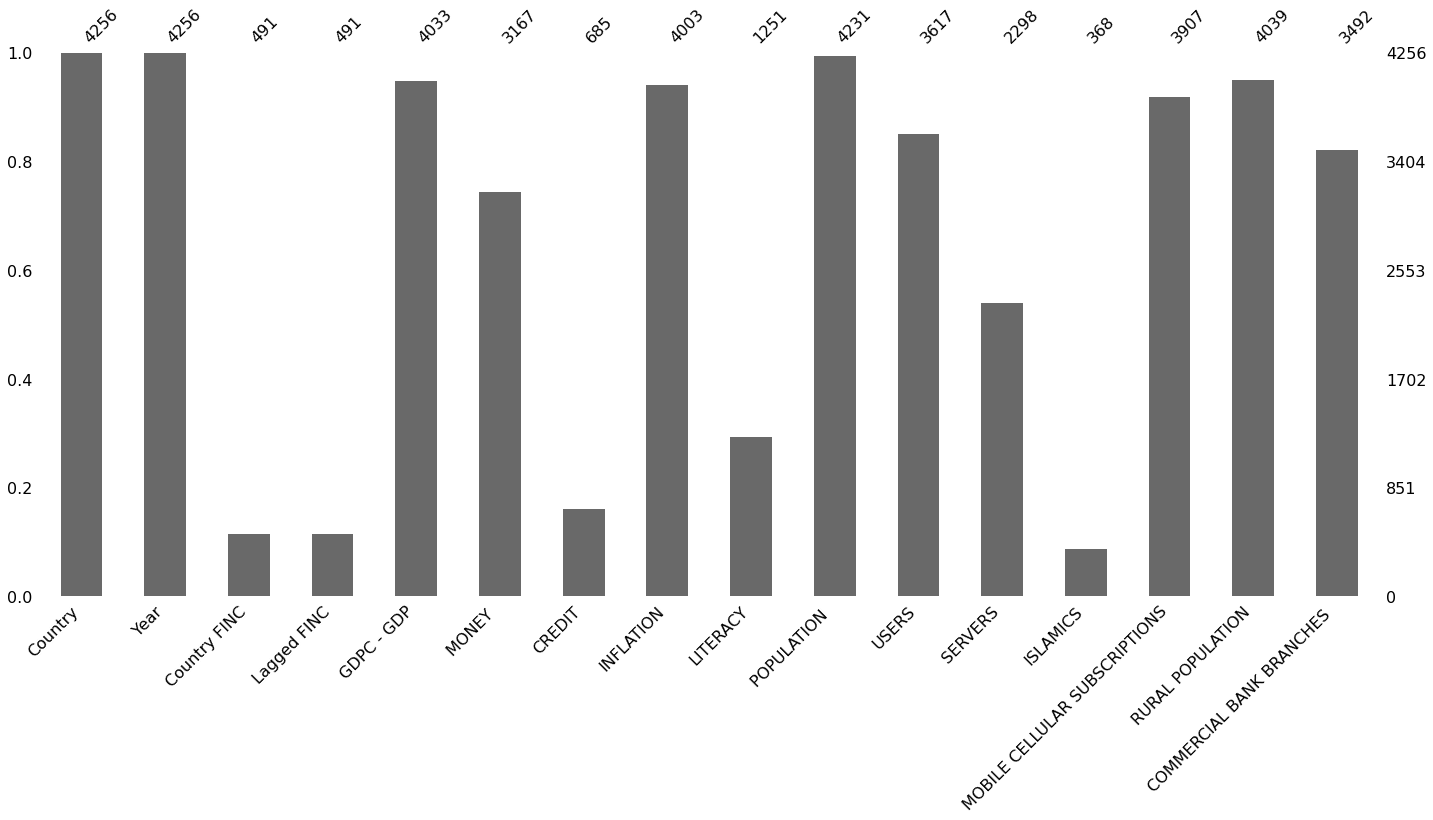

In [7]:
msno.bar(df)

<AxesSubplot:>

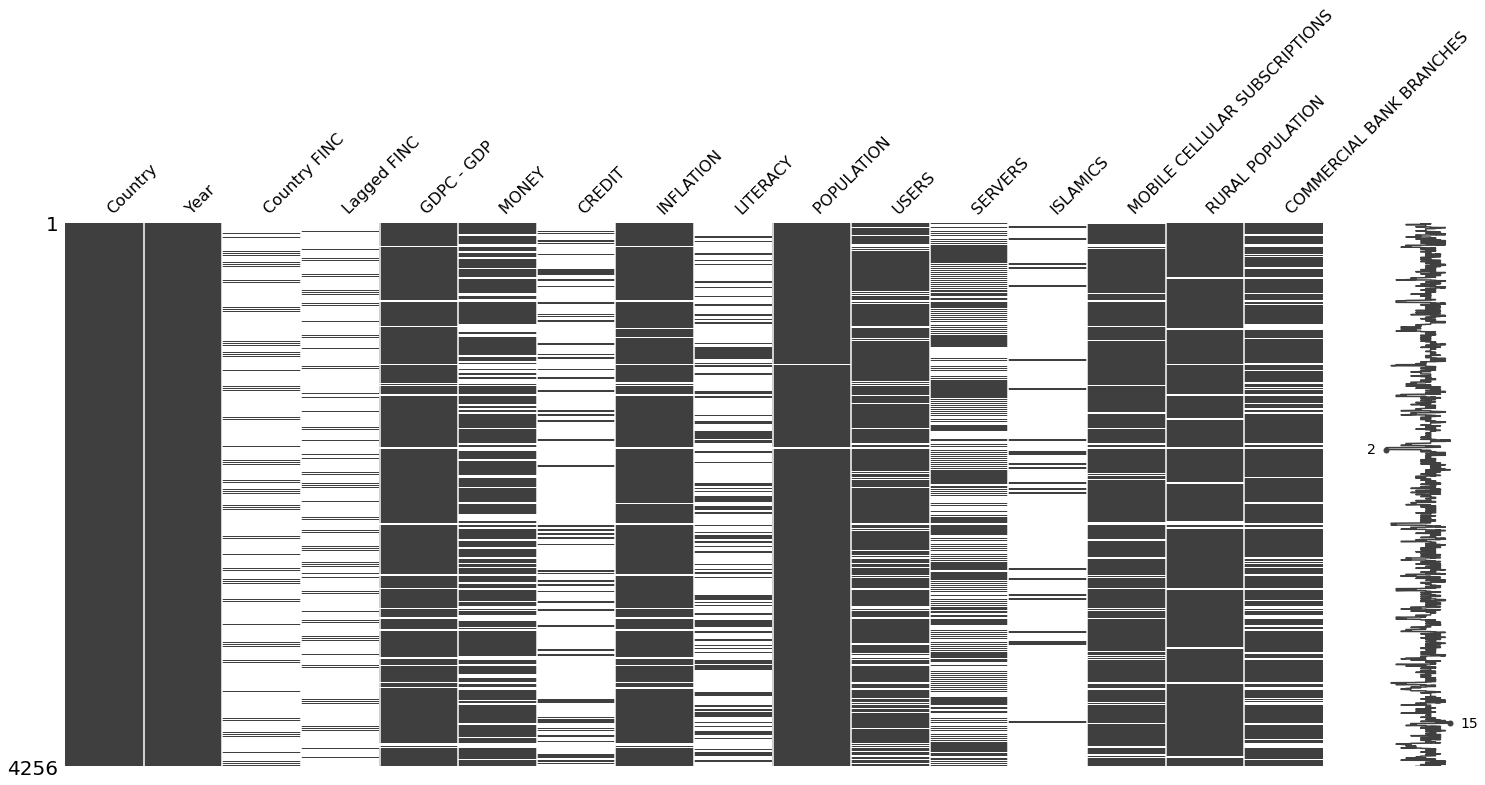

In [8]:
# now lets plot another missing values graph
msno.matrix(df)

- The white lines in the above graph shows the missing values

### Filling the Missing values

Missing values are a huge trouble in real world datasets, we often face this situations
In order to deal with the missing values, we use different techniques
Some are given below
- Remove Missing values
- Fill missing values using Mean, Median and Mode
- We predict the missing values using machine learning 

In our case, we are going to deal the missing values the following ways.
- Fill the missing values using Mean, Median and mode
- We will fill only Independent features (X) using the above statistical methods
- We will then train a model which will predict the missing values in Country FINC (dependent feature Y)



In [9]:
df1 = df['Country FINC']
data = pd.DataFrame(df1,columns=['Country FINC'])
data

,Country FINC
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4251,NaN
4252,55.285137
4253,NaN
4254,NaN


In [10]:
df2 = df.drop('Country FINC', axis = 1)
df2

,Country,Year,Lagged FINC,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,Aruba,2005,NaN,23300.738363,58.168744,NaN,3.332795,NaN,11.513205,25.400000,NaN,NaN,103.384951,55.125,NaN
1,Aruba,2006,NaN,24046.226377,57.244240,NaN,2.945295,NaN,11.521191,28.000000,NaN,NaN,108.128211,55.489,NaN
2,Aruba,2007,NaN,25834.111778,54.825892,NaN,5.949807,NaN,11.525111,30.900000,NaN,NaN,112.214736,55.853,NaN
3,Aruba,2008,NaN,27083.634860,60.877086,NaN,5.072878,NaN,11.526454,52.000000,NaN,NaN,119.187435,56.217,NaN
4,Aruba,2009,NaN,24631.182052,70.724346,NaN,1.727073,NaN,11.527341,58.000000,NaN,NaN,126.164309,56.579,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,Zimbabwe,2016,NaN,1464.588957,27.438656,NaN,2.160993,NaN,16.456733,23.119989,194.0,NaN,91.793458,67.704,5.82
4252,Zimbabwe,2017,NaN,1335.665064,32.799112,NaN,10.781038,NaN,16.471327,24.400000,435.0,NaN,98.985073,67.763,5.64
4253,Zimbabwe,2018,55.285137,1352.162653,25.156144,NaN,61.310986,NaN,16.485430,25.000000,673.0,NaN,89.404869,67.791,5.48
4254,Zimbabwe,2019,NaN,1156.154864,21.280394,NaN,350.000000,NaN,16.499642,25.100000,991.0,NaN,90.102290,67.790,3.75


In [11]:
df3 = df2.fillna(df2.median())
df3

,Country,Year,Lagged FINC,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,Aruba,2005,51.032455,23300.738363,58.168744,60.329392,3.332795,87.197533,11.513205,25.400000,318.5,1.0,103.384951,55.125,12.39
1,Aruba,2006,51.032455,24046.226377,57.244240,60.329392,2.945295,87.197533,11.521191,28.000000,318.5,1.0,108.128211,55.489,12.39
2,Aruba,2007,51.032455,25834.111778,54.825892,60.329392,5.949807,87.197533,11.525111,30.900000,318.5,1.0,112.214736,55.853,12.39
3,Aruba,2008,51.032455,27083.634860,60.877086,60.329392,5.072878,87.197533,11.526454,52.000000,318.5,1.0,119.187435,56.217,12.39
4,Aruba,2009,51.032455,24631.182052,70.724346,60.329392,1.727073,87.197533,11.527341,58.000000,318.5,1.0,126.164309,56.579,12.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,Zimbabwe,2016,51.032455,1464.588957,27.438656,60.329392,2.160993,87.197533,16.456733,23.119989,194.0,1.0,91.793458,67.704,5.82
4252,Zimbabwe,2017,51.032455,1335.665064,32.799112,60.329392,10.781038,87.197533,16.471327,24.400000,435.0,1.0,98.985073,67.763,5.64
4253,Zimbabwe,2018,55.285137,1352.162653,25.156144,60.329392,61.310986,87.197533,16.485430,25.000000,673.0,1.0,89.404869,67.791,5.48
4254,Zimbabwe,2019,51.032455,1156.154864,21.280394,60.329392,350.000000,87.197533,16.499642,25.100000,991.0,1.0,90.102290,67.790,3.75


In [12]:
df4 = pd.concat([data, df3], axis = 1)
df4.head()

,Country FINC,Country,Year,Lagged FINC,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,NaN,Aruba,2005,51.032455,23300.738363,58.168744,60.329392,3.332795,87.197533,11.513205,25.4,318.5,1.0,103.384951,55.125,12.39
1,NaN,Aruba,2006,51.032455,24046.226377,57.244240,60.329392,2.945295,87.197533,11.521191,28.0,318.5,1.0,108.128211,55.489,12.39
2,NaN,Aruba,2007,51.032455,25834.111778,54.825892,60.329392,5.949807,87.197533,11.525111,30.9,318.5,1.0,112.214736,55.853,12.39
3,NaN,Aruba,2008,51.032455,27083.634860,60.877086,60.329392,5.072878,87.197533,11.526454,52.0,318.5,1.0,119.187435,56.217,12.39
4,NaN,Aruba,2009,51.032455,24631.182052,70.724346,60.329392,1.727073,87.197533,11.527341,58.0,318.5,1.0,126.164309,56.579,12.39


In [13]:
df5 = df4.drop(['Lagged FINC'], axis = 1)
df5

,Country FINC,Country,Year,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,NaN,Aruba,2005,23300.738363,58.168744,60.329392,3.332795,87.197533,11.513205,25.400000,318.5,1.0,103.384951,55.125,12.39
1,NaN,Aruba,2006,24046.226377,57.244240,60.329392,2.945295,87.197533,11.521191,28.000000,318.5,1.0,108.128211,55.489,12.39
2,NaN,Aruba,2007,25834.111778,54.825892,60.329392,5.949807,87.197533,11.525111,30.900000,318.5,1.0,112.214736,55.853,12.39
3,NaN,Aruba,2008,27083.634860,60.877086,60.329392,5.072878,87.197533,11.526454,52.000000,318.5,1.0,119.187435,56.217,12.39
4,NaN,Aruba,2009,24631.182052,70.724346,60.329392,1.727073,87.197533,11.527341,58.000000,318.5,1.0,126.164309,56.579,12.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,NaN,Zimbabwe,2016,1464.588957,27.438656,60.329392,2.160993,87.197533,16.456733,23.119989,194.0,1.0,91.793458,67.704,5.82
4252,55.285137,Zimbabwe,2017,1335.665064,32.799112,60.329392,10.781038,87.197533,16.471327,24.400000,435.0,1.0,98.985073,67.763,5.64
4253,NaN,Zimbabwe,2018,1352.162653,25.156144,60.329392,61.310986,87.197533,16.485430,25.000000,673.0,1.0,89.404869,67.791,5.48
4254,NaN,Zimbabwe,2019,1156.154864,21.280394,60.329392,350.000000,87.197533,16.499642,25.100000,991.0,1.0,90.102290,67.790,3.75


In [92]:
# we will seperate NULL values from Country FINC into Test_data variable
Test_data = df5[df5['Country FINC'].isnull()]
Test_data

,Country FINC,Country,Year,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES


In [15]:
df5.dropna(inplace = True)
df5

,Country FINC,Country,Year,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
38,9.005013,Afghanistan,2011,591.162798,36.624228,60.329392,16.593347,31.448851,17.220614,5.00000,16.0,1.0,45.813626,76.052,2.22
41,9.961000,Afghanistan,2014,613.856505,34.209597,60.329392,0.566945,87.197533,17.323192,7.00000,57.0,1.0,55.159515,75.413,2.30
44,14.893312,Afghanistan,2017,519.888913,36.861261,60.329392,2.403656,87.197533,17.407221,34.80000,1577.0,1.0,65.929134,74.750,2.04
70,39.203541,Angola,2011,4615.468219,34.978872,60.329392,31.771549,87.197533,17.002717,3.10000,45.0,1.0,49.846773,39.472,8.37
73,29.318121,Angola,2014,5408.411700,35.675553,60.329392,3.560821,66.030113,17.109189,21.40000,160.0,1.0,52.158983,37.269,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,35.644871,Zambia,2014,1762.427817,20.926979,25.806475,5.435782,87.197533,16.549865,34.80000,63.0,1.0,65.681859,58.618,4.83
4236,45.863258,Zambia,2017,1535.196574,21.963248,31.213591,10.095730,87.197533,16.640075,34.80000,714.0,1.0,79.736910,57.024,4.63
4246,39.651211,Zimbabwe,2011,1093.653409,20.685935,60.329392,2.553176,83.582710,16.372298,8.40000,12.0,1.0,71.349234,66.985,6.22
4249,32.389252,Zimbabwe,2014,1434.896277,22.451986,60.329392,-0.252141,88.693420,16.424603,16.36474,108.0,1.0,86.839674,67.496,14.77


In [16]:
y_train = df5['Country FINC']
y_train

38       9.005013
41       9.961000
44      14.893312
70      39.203541
73      29.318121
          ...    
4233    35.644871
4236    45.863258
4246    39.651211
4249    32.389252
4252    55.285137
Name: Country FINC, Length: 491, dtype: float64

In [17]:
y_train.shape

(491,)

In [18]:
x_train = df5.drop(['Country FINC','Country'], axis = 1)
x_train

,Year,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
38,2011,591.162798,36.624228,60.329392,16.593347,31.448851,17.220614,5.00000,16.0,1.0,45.813626,76.052,2.22
41,2014,613.856505,34.209597,60.329392,0.566945,87.197533,17.323192,7.00000,57.0,1.0,55.159515,75.413,2.30
44,2017,519.888913,36.861261,60.329392,2.403656,87.197533,17.407221,34.80000,1577.0,1.0,65.929134,74.750,2.04
70,2011,4615.468219,34.978872,60.329392,31.771549,87.197533,17.002717,3.10000,45.0,1.0,49.846773,39.472,8.37
73,2014,5408.411700,35.675553,60.329392,3.560821,66.030113,17.109189,21.40000,160.0,1.0,52.158983,37.269,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,2014,1762.427817,20.926979,25.806475,5.435782,87.197533,16.549865,34.80000,63.0,1.0,65.681859,58.618,4.83
4236,2017,1535.196574,21.963248,31.213591,10.095730,87.197533,16.640075,34.80000,714.0,1.0,79.736910,57.024,4.63
4246,2011,1093.653409,20.685935,60.329392,2.553176,83.582710,16.372298,8.40000,12.0,1.0,71.349234,66.985,6.22
4249,2014,1434.896277,22.451986,60.329392,-0.252141,88.693420,16.424603,16.36474,108.0,1.0,86.839674,67.496,14.77


In [19]:
x_train.shape

(491, 13)

### Predicting Country FINC using Linear, Ridge, Polynomial and Lasso Regression
now the real action is going to be perfomed
- We will import Linear Regression Model
- Then we will pass x_train and y_train to the model to train it
- then we will predict the Country FINC, those fields which are missing

In [20]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

In [21]:
Model.fit(x_train,y_train)

LinearRegression()

- Now our linear Regression model is trained on x and y train data
- Now we will predict the test_data on the model
- lets see what it the prediction and accuracy rate of our model

In [22]:
x_test = Test_data.drop(['Country FINC','Country'], axis = 1)
x_test

,Year,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,2005,23300.738363,58.168744,60.329392,3.332795,87.197533,11.513205,25.400000,318.5,1.0,103.384951,55.125,12.39
1,2006,24046.226377,57.244240,60.329392,2.945295,87.197533,11.521191,28.000000,318.5,1.0,108.128211,55.489,12.39
2,2007,25834.111778,54.825892,60.329392,5.949807,87.197533,11.525111,30.900000,318.5,1.0,112.214736,55.853,12.39
3,2008,27083.634860,60.877086,60.329392,5.072878,87.197533,11.526454,52.000000,318.5,1.0,119.187435,56.217,12.39
4,2009,24631.182052,70.724346,60.329392,1.727073,87.197533,11.527341,58.000000,318.5,1.0,126.164309,56.579,12.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,2015,1445.069702,23.724442,60.329392,0.607814,87.197533,16.441240,22.742818,162.0,1.0,92.347105,67.615,6.01
4251,2016,1464.588957,27.438656,60.329392,2.160993,87.197533,16.456733,23.119989,194.0,1.0,91.793458,67.704,5.82
4253,2018,1352.162653,25.156144,60.329392,61.310986,87.197533,16.485430,25.000000,673.0,1.0,89.404869,67.791,5.48
4254,2019,1156.154864,21.280394,60.329392,350.000000,87.197533,16.499642,25.100000,991.0,1.0,90.102290,67.790,3.75


In [23]:
# Lets predict the country FINC

Country_FINC_Prediction = Model.predict(x_test)

In [24]:
# we got 74% accuracy using Linear Regression
Model.score(x_train,y_train)

0.7403877170421437

In [25]:
Country_FINC_Prediction

array([ 32.67806847,  35.48070628,  38.32308305, ...,  29.61608769,
        -7.74092872, -31.56535447])

In [26]:
# Test = Test_data
# Test.loc[Test['Country FINC'].isnull(), 'Country FINC'] = Country_FINC_Prediction

In [27]:
# Test

In [28]:
# Test.to_csv('Prediction Linear Regression.csv')

#### Now lets check Ridge Regression

In [29]:
from sklearn.linear_model import Ridge

In [30]:
# Accuracy is almost the same as for Linear Regression 
# Even after hyperparameter tuning
ridge_regression = Ridge(alpha=100) 
ridge_regression

Ridge(alpha=100)

In [31]:
ridge_regression.fit(x_train, y_train)
# pred = ridge_regression.predict(xtest)

Ridge(alpha=100)

In [32]:
# Accuracy of Ridge Regression is 74%
ridge_regression.score(x_train,y_train)

0.740358959746384

#### Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso_regression = Lasso(alpha=100) 
lasso_regression

Lasso(alpha=100)

In [35]:
lasso_regression.fit(x_train, y_train)

Lasso(alpha=100)

In [36]:
# Lasso Regression gave less accuracy then Ridge and Linear Regression even after Hyperparameter tuning
lasso_regression.score(x_train, y_train)

0.6777573584111267

#### Ploynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly_features = PolynomialFeatures(degree=2)

In [39]:
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(x_train)

In [40]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [60]:
# The polynomial Regression thus gave the highest accuracy which is 86%
Polynomial = poly_model.score(X_train_poly, y_train)
Polynomial

0.8631260629498783

In [42]:
# predicting on test data-set
X_test_poly=poly_features.fit_transform(x_test)
y_test_predict = poly_model.predict(X_test_poly)


In [47]:
y_test_predict

array([  80.1880386 ,   83.00039994,   86.68868631, ...,   63.48328526,
       1035.52756744, 3038.1846891 ])

### Now lets replace the missing values by predicted values

In [44]:
Test_data.loc[Test_data['Country FINC'].isnull(), 'Country FINC'] = y_test_predict

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [45]:
Test_data

,Country FINC,Country,Year,GDPC - GDP,MONEY,CREDIT,INFLATION,LITERACY,POPULATION,USERS,SERVERS,ISLAMICS,MOBILE CELLULAR SUBSCRIPTIONS,RURAL POPULATION,COMMERCIAL BANK BRANCHES
0,80.188039,Aruba,2005,23300.738363,58.168744,60.329392,3.332795,87.197533,11.513205,25.400000,318.5,1.0,103.384951,55.125,12.39
1,83.000400,Aruba,2006,24046.226377,57.244240,60.329392,2.945295,87.197533,11.521191,28.000000,318.5,1.0,108.128211,55.489,12.39
2,86.688686,Aruba,2007,25834.111778,54.825892,60.329392,5.949807,87.197533,11.525111,30.900000,318.5,1.0,112.214736,55.853,12.39
3,110.691652,Aruba,2008,27083.634860,60.877086,60.329392,5.072878,87.197533,11.526454,52.000000,318.5,1.0,119.187435,56.217,12.39
4,114.961917,Aruba,2009,24631.182052,70.724346,60.329392,1.727073,87.197533,11.527341,58.000000,318.5,1.0,126.164309,56.579,12.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,35.021567,Zimbabwe,2015,1445.069702,23.724442,60.329392,0.607814,87.197533,16.441240,22.742818,162.0,1.0,92.347105,67.615,6.01
4251,36.591738,Zimbabwe,2016,1464.588957,27.438656,60.329392,2.160993,87.197533,16.456733,23.119989,194.0,1.0,91.793458,67.704,5.82
4253,63.483285,Zimbabwe,2018,1352.162653,25.156144,60.329392,61.310986,87.197533,16.485430,25.000000,673.0,1.0,89.404869,67.791,5.48
4254,1035.527567,Zimbabwe,2019,1156.154864,21.280394,60.329392,350.000000,87.197533,16.499642,25.100000,991.0,1.0,90.102290,67.790,3.75


In [48]:
Test_data.to_csv('Prediction Polynomial Regression.csv')

### Let visualize the results

- We will now make a table from the accuracies of different models
-  Than we will plot bar charts to give comparison

In [65]:
Linear_accuracy = pd.DataFrame(Model.score(x_train,y_train),columns=['Accuracy'], index = ['Linear Regression'])
Linear_accuracy

,Accuracy
Linear Regression,0.740388


In [66]:
Ridge_accuracy = pd.DataFrame(ridge_regression.score(x_train,y_train),columns=['Accuracy'], index = ['Ridge Regression'])
Ridge_accuracy

,Accuracy
Ridge Regression,0.740359


In [67]:
Lasso_accuracy = pd.DataFrame(lasso_regression.score(x_train,y_train),columns=['Accuracy'], index = ['Lasso Regression'])
Lasso_accuracy

,Accuracy
Lasso Regression,0.677757


In [68]:
Polynomial_accuracy = pd.DataFrame(Polynomial,columns=['Accuracy'], index = ['Polynomial Regression'])
Polynomial_accuracy

,Accuracy
Polynomial Regression,0.863126


In [69]:
Model_Score = pd.concat([Linear_accuracy,Ridge_accuracy,Lasso_accuracy,Polynomial_accuracy], axis=0)
Model_Score

,Accuracy
Linear Regression,0.740388
Ridge Regression,0.740359
Lasso Regression,0.677757
Polynomial Regression,0.863126


(array([0]), [Text(0, 0, 'Accuracy')])

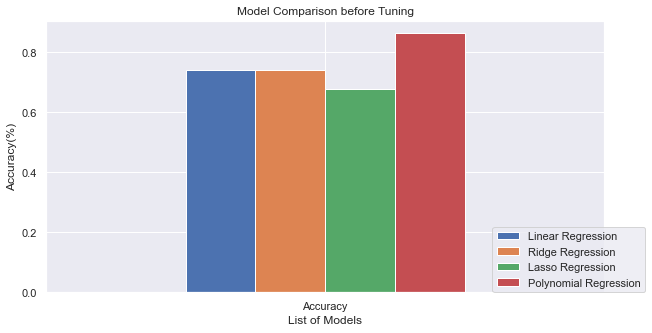

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
Model_Score.T.plot.bar()
plt.title('Model Comparison before Tuning')
plt.xlabel('List of Models')
plt.ylabel('Accuracy(%)')
plt.legend(loc=(0.8,0))
plt.xticks(rotation = 0)